### Importing Packages

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import GPy

warning in stationary: failed to import cython module: falling back to numpy
warning in coregionalize: failed to import cython module: falling back to numpy
warning in choleskies: failed to import cython module: falling back to numpy


### Building the Kernel(Covariance Matrix)

$$
    \kappa_\mathrm{rbf}(x,x') = \sigma^2\exp\left(-\frac{(x-x')^2}{2\mathscr{l}^2}\right)
$$

In [2]:
# Create a 1-D RBF kernel with default parameters
k = GPy.kern.RBF(1)
k

rbf.,value,constraints,priors
variance,1.0,+ve,
lengthscale,1.0,+ve,


### Visualizing Kernel

In [3]:
X = np.linspace(-4.,4.,100)[:, None] # we need [:, None] to reshape X into a column vector for use in GPy

#### k(X,0)

In [4]:
# First, sample kernel at x' = 0
K0 = k.K(X, np.array([[0.]])) # k(x,0)
K0

array([[3.35462628e-04],
       [4.61959816e-04],
       [6.32016381e-04],
       [8.59046258e-04],
       [1.16002900e-03],
       [1.55627099e-03],
       [2.07427188e-03],
       [2.74669361e-03],
       [3.61342326e-03],
       [4.72271279e-03],
       [6.13236949e-03],
       [7.91095973e-03],
       [1.01389764e-02],
       [1.29099076e-02],
       [1.63311300e-02],
       [2.05245393e-02],
       [2.56268178e-02],
       [3.17892311e-02],
       [3.91768440e-02],
       [4.79670435e-02],
       [5.83472693e-02],
       [7.05118648e-02],
       [8.46579886e-02],
       [1.00980559e-01],
       [1.19666249e-01],
       [1.40886593e-01],
       [1.64790334e-01],
       [1.91495195e-01],
       [2.21079315e-01],
       [2.53572656e-01],
       [2.88948742e-01],
       [3.27117124e-01],
       [3.67916978e-01],
       [4.11112291e-01],
       [4.56389004e-01],
       [5.03354510e-01],
       [5.51539774e-01],
       [6.00404295e-01],
       [6.49343988e-01],
       [6.97701953e-01],


Text(0.5, 1.0, '$\\kappa_{rbf}(x,0)$')

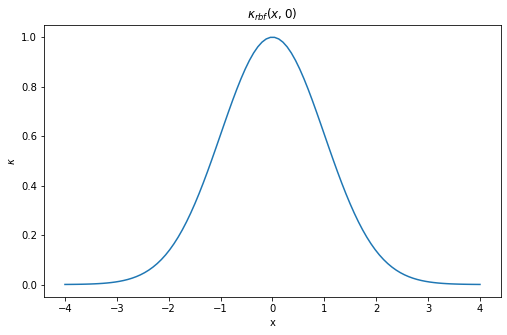

In [5]:
# Set up the plotting environment
plt.figure(figsize=(18,5))
plt.subplot(121) # left plot
# Plot covariance vector
plt.plot(X,K0)
# Annotate plot
plt.xlabel("x"), plt.ylabel("$\kappa$")
plt.title("$\kappa_{rbf}(x,0)$")


####  k(x,x')

In [6]:
K = k.K(X,X)
np.size(K)
K

array([[1.00000000e+00, 9.96740351e-01, 9.87025018e-01, ...,
        4.55424927e-14, 2.40943186e-14, 1.26641655e-14],
       [9.96740351e-01, 1.00000000e+00, 9.96740351e-01, ...,
        8.55230198e-14, 4.55424927e-14, 2.40943186e-14],
       [9.87025018e-01, 9.96740351e-01, 1.00000000e+00, ...,
        1.59556073e-13, 8.55230198e-14, 4.55424927e-14],
       ...,
       [4.55424927e-14, 8.55230198e-14, 1.59556073e-13, ...,
        1.00000000e+00, 9.96740351e-01, 9.87025018e-01],
       [2.40943186e-14, 4.55424927e-14, 8.55230198e-14, ...,
        9.96740351e-01, 1.00000000e+00, 9.96740351e-01],
       [1.26641655e-14, 2.40943186e-14, 4.55424927e-14, ...,
        9.87025018e-01, 9.96740351e-01, 1.00000000e+00]])

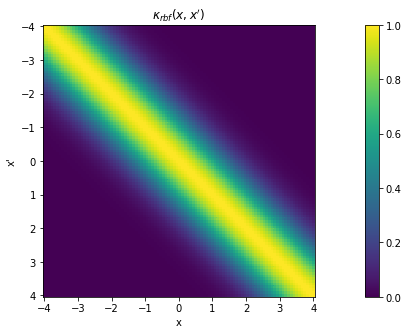

In [7]:
# Plot the covariance of the sample space
plt.figure(figsize=(18,5))

plt.pcolor(X.T, X, K)

# Format and annotate plot
plt.gca().invert_yaxis(), plt.gca().axis("image")
plt.xlabel("x"), plt.ylabel("x'"), plt.colorbar()
plt.title("$\kappa_{rbf}(x,x')$");

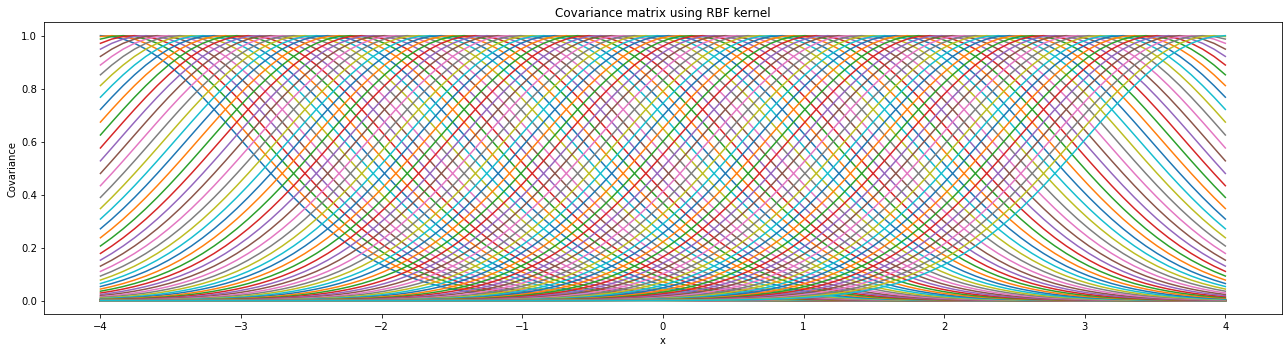

In [8]:
plt.figure(figsize=(18,5))
plt.plot(X, K)
plt.xlabel("x")
plt.ylabel("Covariance")
plt.title("Covariance matrix using RBF kernel")

plt.tight_layout()
plt.show()

### Effect of different Length Scale 

In [9]:
# 250 samples in the interval [-4,4] 
X = np.linspace(-4.,4.,250)[:, None] # we use more samples to get a smoother plot at low lengthscales
k = GPy.kern.RBF(1)
plt.figure(figsize=(18, 915))


<Figure size 1296x65880 with 0 Axes>

<Figure size 1296x65880 with 0 Axes>

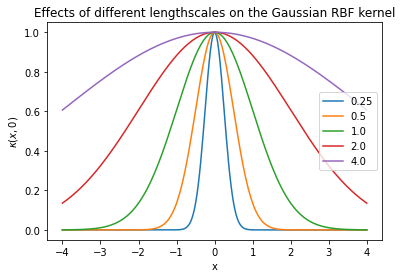

In [10]:
# Set up our list of different lengthscales
ls = [0.25, 0.5, 1., 2., 4.]
for l in ls:
    k.lengthscale = l
    C = k.K(X, np.array([[0.]]))
    plt.plot(X,C)
# Annotate plot
plt.xlabel("x"), plt.ylabel("$\kappa(x,0)$") 
plt.title("Effects of different lengthscales on the Gaussian RBF kernel")
plt.legend(labels=ls);

### Sampling From a Gaussian Process(Gaussian Prior)

In [11]:
ks = [ # List of example kernels
    GPy.kern.RBF(1, lengthscale=1.),
    GPy.kern.RBF(1, lengthscale=0.5),
    GPy.kern.RBF(1, lengthscale=0.25, variance=2.)
]
# The name of our kernels (for the legend)
kernel_name = ["RBF ls=1", "RBF ls=0.5", "RBF ls=0.25, var=2"]    

In [12]:
# Our sample space
X = np.linspace(-5., 5., 250)[:, None]


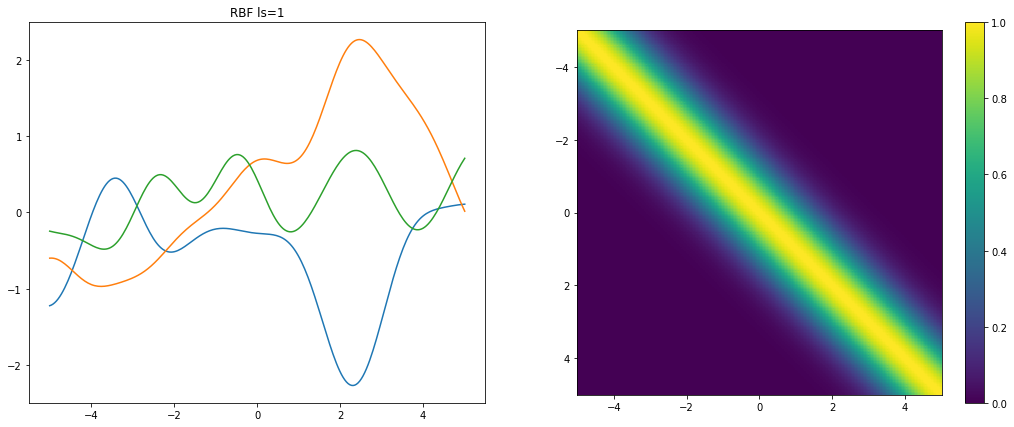

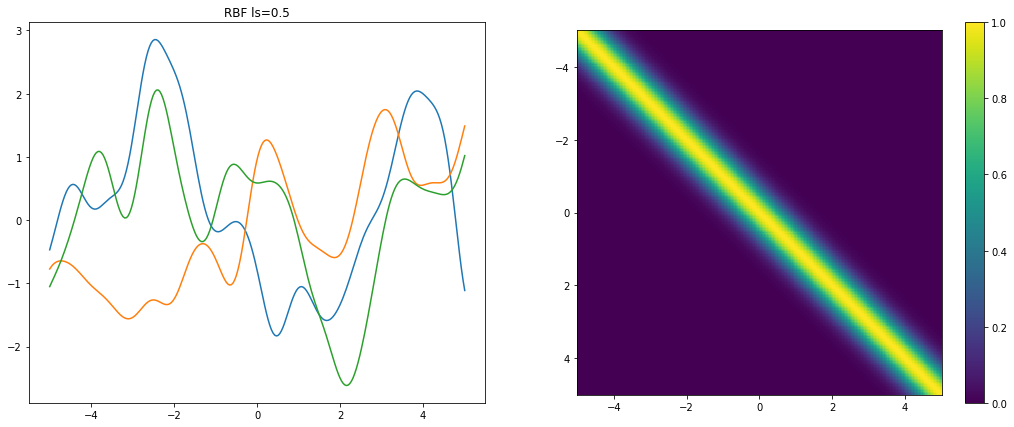

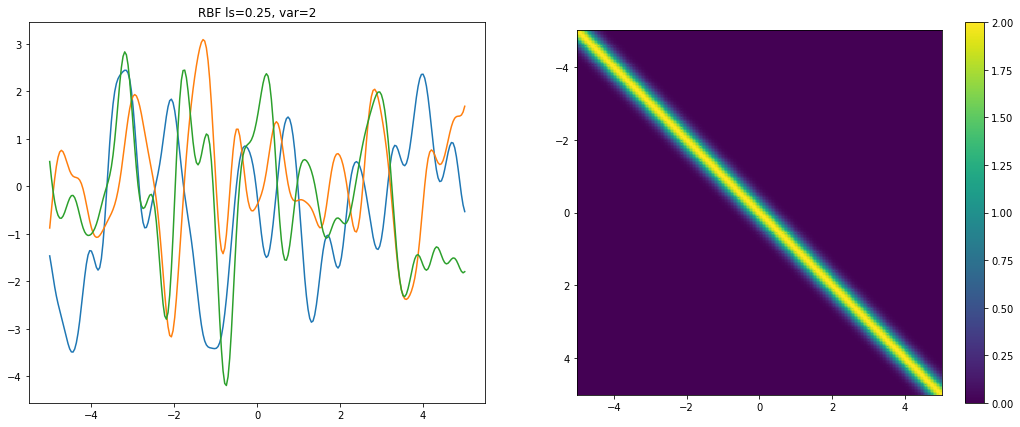

In [13]:
# Loop through our kernels
for i,k in enumerate(ks):
    # The mean function is set to 0
    mu = np.zeros((250)) # we have 250 sample inputs
    # Get the covariance matrix
    if i is not 11:
        C  = k.K(X,X)
    else: # We have to sample White noise kernel differently
        C = k.K(X)
        
        
    # Sample 3 times from a multivariate Gaussian distribution with mean 0 and covariance k(X,X)
    Z  = np.random.multivariate_normal(mu, C, 3)
    
    # Setup figure environment
    plt.figure(figsize=(18, 7))
    
    # Show samples on left hand side
    plt.subplot(121)
    for j in range(3 if i < 11 else 2): # Loop through samples
        plt.plot(X[:],Z[j,:])
        plt.title(kernel_name[i])
        
    # Visualise covariance matrix on right hand side
    plt.subplot(122)
    plt.pcolor(X.T, X, C)
    # Annotate plot
    plt.gca().invert_yaxis(), plt.gca().axis("image")
    plt.colorbar()

In [14]:
Z  = np.random.multivariate_normal(mu, C, 3)
np.size(Z)

750

### Gaussian Process Regression(Posterior)


$$
    f(x) = -\cos(2\pi x) + \frac{1}{2}\sin(6\pi x)
$$
$$
    \mathbf{y} = f(\mathbf{X}) + \epsilon, \quad \epsilon \sim \mathcal{N}(0, 0.01)
$$

In [15]:
# lambda function, call f(x) to generate data
f = lambda x: -np.cos(2*np.pi*x) + 0.5*np.sin(6*np.pi*x)

X = np.linspace(0.05, 0.95, 10)[:,None]
Y = f(X) + np.random.normal(0., 0.1, (10,1)) # note that np.random.normal takes mean and s.d. (not variance), 0.1^2 = 0.01
Y

array([[-0.56031233],
       [-0.35877269],
       [-0.12244872],
       [ 0.84208487],
       [ 1.28617047],
       [ 0.52283563],
       [ 0.33517012],
       [ 0.5905539 ],
       [-0.66588206],
       [-1.4367923 ]])

### Ackley function

In [16]:
from numpy import exp, sqrt, cos, pi
# Define the Ackley function as a lambda function
f = lambda x: -20 * exp(-0.2 * sqrt(0.5 * (x[0]**2 + x[1]**2))) - exp(0.5 * (cos(2 * pi * x[0]) + cos(2 * pi * x[1]))) + exp(1) + 20

# Generate data points and add noise
X = np.linspace(0.05, 0.95, 10)[:, None]
Y = f(X) + np.random.normal(0., 0.1, (10, 1))  # Adding noise
Y

array([[1.20348903],
       [1.13256737],
       [1.12127588],
       [1.06399889],
       [0.9874817 ],
       [0.89273165],
       [1.08533334],
       [1.0596713 ],
       [1.04838072],
       [0.99175062]])

### Buckin Function

In [35]:
f = lambda x: 100 * np.sqrt(np.abs(x[1] - 0.01 * x[0]**2)) + 0.01 * np.abs(x[0] + 10)

# Generate data points and add noise
X = np.linspace(-15, -5, 10)[:, None]  # Adjust the range for your specific needs
Y = f(X) + np.random.normal(0., 1.0, (10, 1)) 

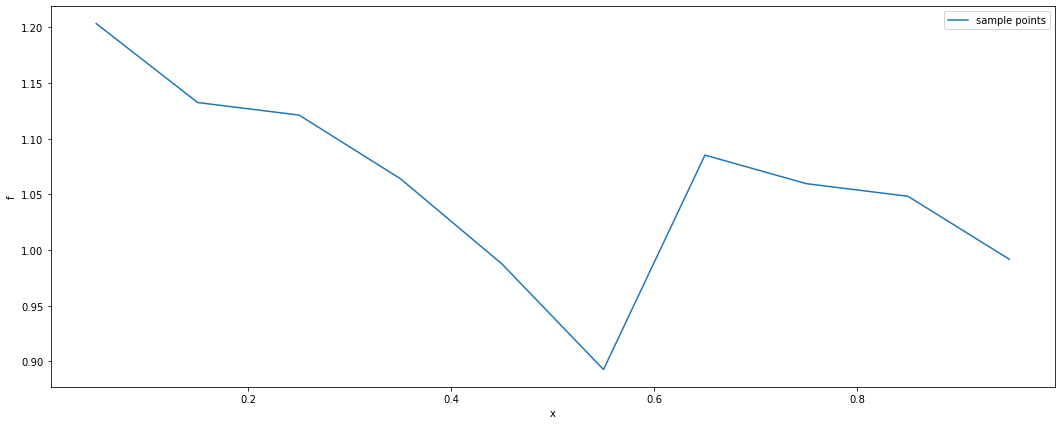

In [17]:
# Plot observations
plt.figure(figsize=(18, 7))
plt.plot(X, Y, "-")

# Annotate plot
plt.xlabel("x"), plt.ylabel("f")
plt.legend(labels=["sample points"]);

In [18]:
k = GPy.kern.RBF(1, variance=1., lengthscale=0.1, name="rbf")

$$
\left.\mathbf{f}^*\,\right|\,\mathbf{X}^*,\mathbf{X},\mathbf{y} \sim \mathcal{N}\left(\mathbf{m}, \mathbf{C}\right),
$$

where $
\mathbf{m} = \mathbf{K}_{*x}(\mathbf{K}_{xx} + \sigma^2\mathbf{I})^{-1}\mathbf{y}$ and $\mathbf{C} = \mathbf{K}_{**} -  \mathbf{K}_{*x}(\mathbf{K}_{xx} + \sigma^2\mathbf{I})^{-1}\mathbf{K}_{*x}^\text{T}
$ and covariance matrices are defined by evaluations of the kernel functions: $\mathbf{K}_{xx} = k(\mathbf{X}, \mathbf{X})$; $\mathbf{K}_{*x} = k(\mathbf{X}^*, \mathbf{X})$; and $\mathbf{K}_{**} = k(\mathbf{X}^*,\mathbf{X}^*)$.

In [19]:
# New test points to sample function from
Xnew = np.linspace(-0.05, 1.05, 100)[:, None]

# Covariance between training sample points (+ Gaussian noise)
Kxx = k.K(X,X) + 1 * np.eye(10)

# Covariance between training and test points
Ksx = k.K(Xnew, X)

# Covariance between test points
Kss = k.K(Xnew,Xnew)

### Conditioned Mean

In [20]:
# The mean of the GP fit (note that @ is matrix multiplcation: A @ B is equivalent to np.matmul(A,B))
mean = Ksx @ np.linalg.inv(Kxx) @ Y
np.size(mean)

100

In [21]:
# The covariance matrix of the GP fit
Cov = Kss - Ksx @ np.linalg.inv(Kxx) @ Ksx.T
np.size(Cov)

10000

### Plot GP

In [22]:
def plot_gp(X, m, C, training_points=None):
    """ Plotting utility to plot a GP fit with 95% confidence interval """
    # Plot 95% confidence interval 
    plt.fill_between(X[:,0],
                     m[:,0] - 1.96*np.sqrt(np.diag(C)),
                     m[:,0] + 1.96*np.sqrt(np.diag(C)),
                     alpha=0.5)
    # Plot GP mean and initial training points
    plt.plot(X, m, "-")
    plt.legend(labels=["GP fit"])
    
    plt.xlabel("x"), plt.ylabel("f")
    
    # Plot training points if included
    if training_points is not None:
        X_, Y_ = training_points
        plt.plot(X_, Y_, "kx", mew=2)
        plt.legend(labels=["GP fit", "sample points"])

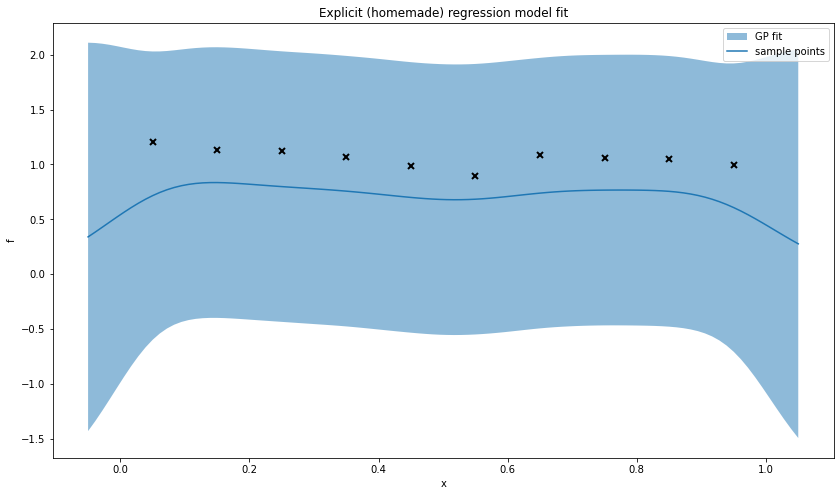

In [23]:
plt.figure(figsize=(14, 8))

# Plot the GP fit mean and covariance
plot_gp(Xnew, mean, Cov, training_points=(X,Y))
plt.title("Explicit (homemade) regression model fit");